## UMOJAHACK EXPRESSO PREDICTION CHURN CHALLENGE USING TENSORFLOW

In [1]:
import pandas as pd

In [2]:
Train = pd.read_csv('../Train.csv')
Test = pd.read_csv('../Test.csv')

In [3]:
Train.head(20)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,NO,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,NO,31,NaN,NaN,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,NO,45,On-net 500F_FNF;3d,8.0,0


In [4]:
Test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [5]:
Train.shape

(2154048, 19)

In [6]:
Test.shape

(380127, 18)

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [9]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [10]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,247072.0,5524.958826,7116.320922,25.0,1000.0,3000.0,7350.0,201500.0
FREQUENCE_RECH,247072.0,11.519853,13.242743,1.0,2.0,7.0,16.0,146.0
REVENUE,252754.0,5499.680468,7195.093138,1.0,1000.0,3000.0,7351.0,200965.0
ARPU_SEGMENT,252754.0,1833.232443,2398.360570,0.0,333.0,1000.0,2450.0,66988.0
FREQUENCE,252754.0,13.957963,14.652660,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,193087.0,3346.095454,12002.653047,0.0,0.0,259.0,2884.0,977796.0
ON_NET,241613.0,278.806310,874.253933,0.0,5.0,27.0,157.0,26786.0
ORANGE,222897.0,95.193008,203.950776,0.0,7.0,29.0,99.0,6345.0
TIGO,153126.0,23.052088,65.042688,0.0,2.0,6.0,20.0,3708.0
ZONE1,29861.0,8.164663,48.857605,0.0,0.0,1.0,3.0,4215.0


In [11]:
Test['MONTANT']

0         5000.0
1          300.0
2         3300.0
3            NaN
4            NaN
           ...  
380122    4000.0
380123       NaN
380124    3950.0
380125    3850.0
380126       NaN
Name: MONTANT, Length: 380127, dtype: float64

## DATA PREPROCESSING

#### DETECTING MISSING VALUES AND REMOVING/REPLACING THEM

In [12]:
# Installing Library to help visualize missing values in the dataset.
!pip install missingno 

#msno.matrix(Train)

In [13]:
import missingno as msno

<AxesSubplot:>

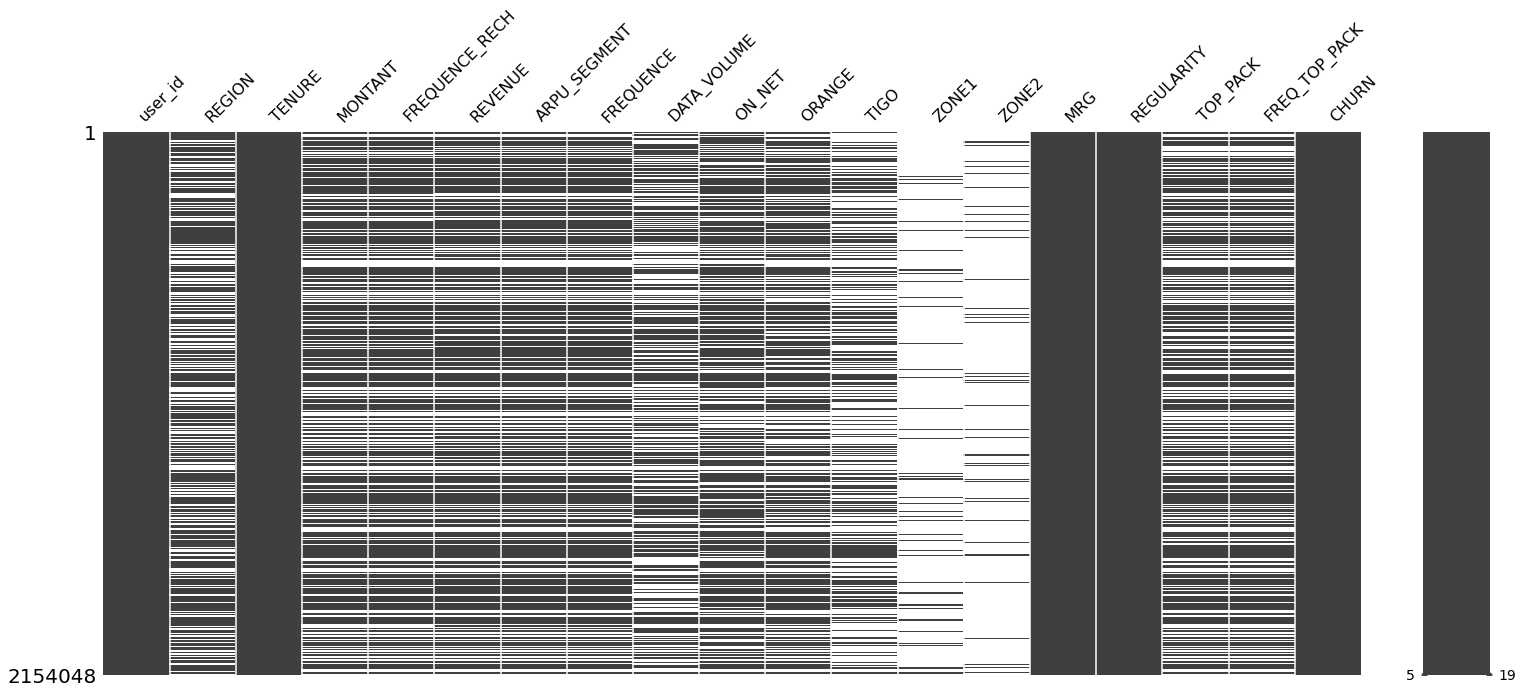

In [14]:
# Viewing missing values in the Train dataset.
# White lines denote the presence of missing values
msno.matrix(Train)

In [15]:
#Finding out the number of null values in the Train dataset
Train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

<AxesSubplot:>

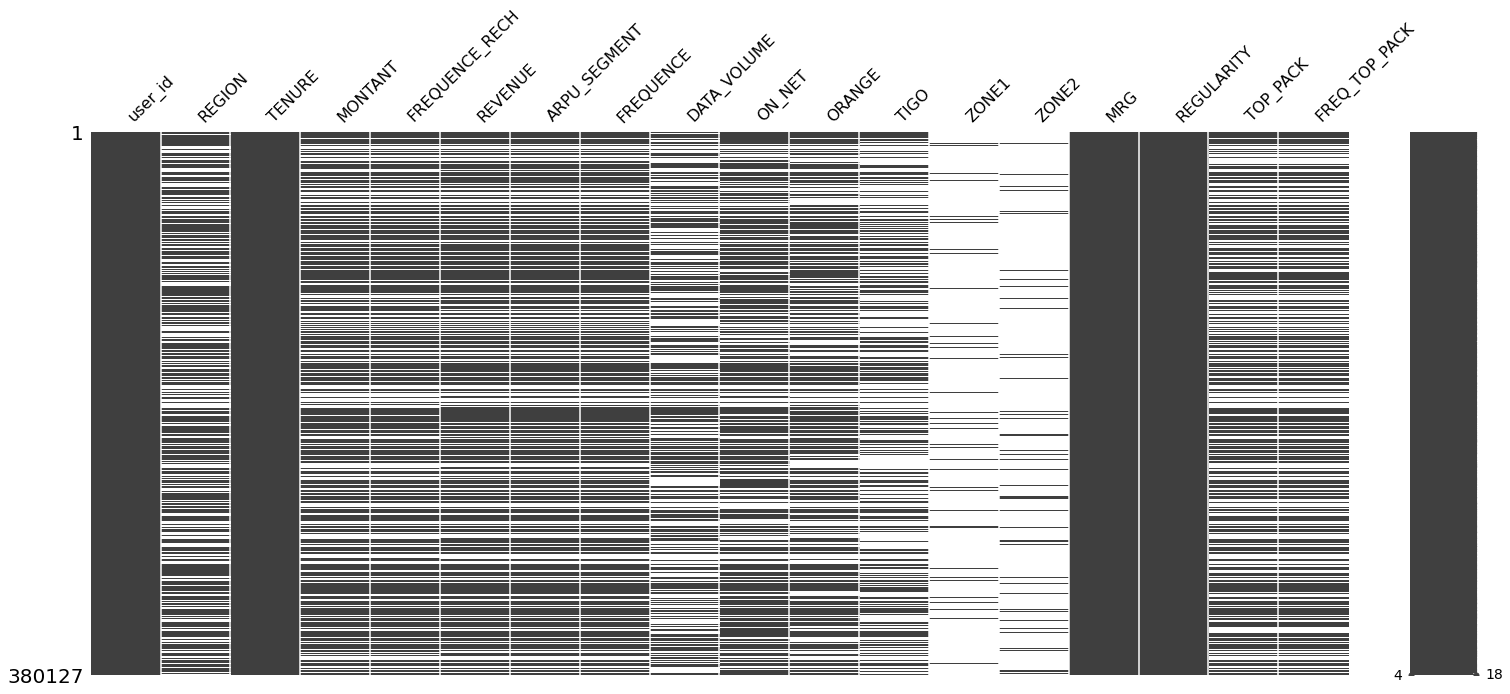

In [16]:
# Viewing missing values in the Test data set
msno.matrix(Test)

In [17]:
#Finding out the number of null values in the Test dataset
Test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

#### DATA CLEANING - DEALING WITH MISSING VALUES

In [18]:
# Removing the ZONE1 and ZONE2 columns from the Train dataset as they have a huge number of null values
Train = Train.drop(['ZONE1', 'ZONE2'], axis=1)

In [19]:
Train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [20]:
# Removing the ZONE1 and ZONE2 columns from the Test dataset as they have a huge number of null values
Test = Test.drop(['ZONE1', 'ZONE2'], axis=1)

In [21]:
Test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [22]:
# IMPORTING THE DATAWIG PYTHON LIBRARY
#!pip install numpy

In [23]:
#pip install numpy

In [24]:
!pip3 install datawig

  Using cached datawig-0.2.0-py3-none-any.whl
  Using cached mxnet-1.4.0-py2.py3-none-win_amd64.whl (21.9 MB)
  Using cached pandas-0.25.3-cp38-cp38-win_amd64.whl (9.4 MB)
  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Using cached typing-3.6.6-py3-none-any.whl (25 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached numpy-1.14.6.zip (4.9 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
    Running setup.py install for numpy: started
    Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\use

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-aldy7v8r\\numpy_50b1f5e3d9a744eb89d337b952f7e984\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-aldy7v8r\\numpy_50b1f5e3d9a744eb89d337b952f7e984\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-k5vv8nx0'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-aldy7v8r\numpy_50b1f5e3d9a744eb89d337b952f7e984\
  Complete output (268 lines):
  Running from numpy source directory.
  C:\Users\User\AppData\Local\Temp\pip-install-aldy7v8r\numpy_50b1f5e3d9a744eb89d337b952f7e984\numpy\distutils\misc_util.py:464: SyntaxWarning: "is" with a literal. Did you mean "=="?
    ret

    warnings.warn(msg)
  running bdist_wheel
  running build
  running config_cc
  unifing config_cc, config, build_clib, build_ext, build commands --compiler options
  running config_fc
  unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
  running build_src
  build_src
  building py_modules sources
  creating build
  creating build\src.win-amd64-3.8
  creating build\src.win-amd64-3.8\numpy
  creating build\src.win-amd64-3.8\numpy\distutils
  building library "npymath" sources
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for numpy
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[

#### DATA NORMALIZATION

In [25]:
#Importing package for Normalizing the data - StandardScaler

from sklearn.preprocessing import StandardScaler

    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries tatlas,tatlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries tatlas,tatlas not found in C:\Users\User\anaconda3\libs
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\User\anaconda3\libs
    <class 'numpy.distutils.system_info.atlas_3_10_threads_info'>
      NOT AVAILABLE
    
    atlas_3_10_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries satlas,satlas not found in C:\U

In [26]:
# Instantiating the scaler method.
scaler = StandardScaler()

In [27]:
# Indicating the columns to normalize
columns_to_normalize = ['MONTANT','FREQUENCE_RECH','REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
                       'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

In [28]:
for i in columns_to_normalize:
    Train[i] = scaler.fit_transform(Train[i].values.reshape(-1, 1))
    Test[i] = scaler.fit_transform(Test[i].values.reshape(-1, 1))

In [29]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,247072.0,2.230669e-16,1.000002,-0.772867,-0.635858,-0.354813,0.256459,27.538870
FREQUENCE_RECH,247072.0,-1.370596e-15,1.000002,-0.794388,-0.718875,-0.341309,0.338310,10.155027
REVENUE,252754.0,-1.439778e-16,1.000002,-0.764228,-0.625383,-0.347415,0.257304,27.166529
ARPU_SEGMENT,252754.0,-2.642363e-16,1.000002,-0.764371,-0.625525,-0.347418,0.257163,27.166431
FREQUENCE,252754.0,2.321087e-16,1.000002,-0.884344,-0.747850,-0.338367,0.344105,5.257898
DATA_VOLUME,193087.0,4.385476e-16,1.000003,-0.278780,-0.278780,-0.257202,-0.038500,81.186420
ON_NET,241613.0,4.378064e-16,1.000002,-0.318908,-0.313189,-0.288025,-0.139326,30.319850
ORANGE,222897.0,-5.464358e-16,1.000002,-0.466746,-0.432424,-0.324555,0.018666,30.643772
TIGO,153126.0,-2.014441e-16,1.000003,-0.354416,-0.323667,-0.262168,-0.046925,56.654484
REGULARITY,380127.0,1.132218e-15,1.000001,-1.215022,-0.990697,-0.183126,1.028231,1.521746


In [30]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,1.007496e-15,1.000000,-0.776523,-0.637309,-0.356068,0.255632,65.313722
FREQUENCE_RECH,1397309.0,7.285633e-16,1.000000,-0.793210,-0.717875,-0.341201,0.336813,9.150993
REVENUE,1428000.0,-4.224057e-17,1.000000,-0.766624,-0.627625,-0.349349,0.258406,73.279268
ARPU_SEGMENT,1428000.0,-3.031500e-18,1.000000,-0.766767,-0.627768,-0.349352,0.258404,73.279259
FREQUENCE,1428000.0,1.977065e-16,1.000000,-0.883225,-0.747116,-0.338787,0.409817,5.241711
DATA_VOLUME,1093615.0,1.565859e-15,1.000000,-0.253032,-0.253032,-0.233715,-0.035436,136.833805
ON_NET,1367373.0,3.289280e-16,1.000000,-0.318200,-0.312470,-0.287261,-0.139442,57.903027
ORANGE,1258800.0,-1.402149e-15,1.000000,-0.465486,-0.431338,-0.324014,0.017471,103.555651
TIGO,864032.0,6.399353e-16,1.000001,-0.363478,-0.332021,-0.269106,-0.048905,65.288111
REGULARITY,2154048.0,-5.223922e-16,1.000000,-1.213384,-0.989036,-0.181385,1.030091,1.523656


#### DETECTING OUTLIERS AND REMOVING THEM

In [31]:
# Relevant libraries to plot the graph
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

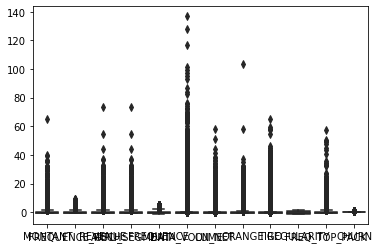

In [32]:
# Plotting a graph (boxplot) of the values in the Train dataset.
sns.boxplot(data=Train, color=".25")

<AxesSubplot:xlabel='FREQ_TOP_PACK'>

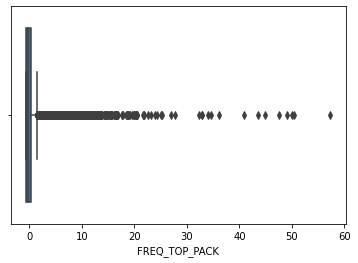

In [33]:
sns.boxplot(x=Train['FREQ_TOP_PACK'])

<AxesSubplot:xlabel='MONTANT'>

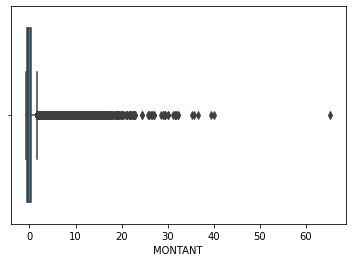

In [34]:
sns.boxplot(x=Train['MONTANT'])

In [37]:
# Applying the RobustScaler Method on the datasets to further reduce the impact of outliers on the data.
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

for i in columns_to_normalize:
    Train[i] = robust_scaler.fit_transform(Train[i].values.reshape(-1, 1))
    Test[i] = robust_scaler.fit_transform(Test[i].values.reshape(-1, 1))

<AxesSubplot:xlabel='MONTANT'>

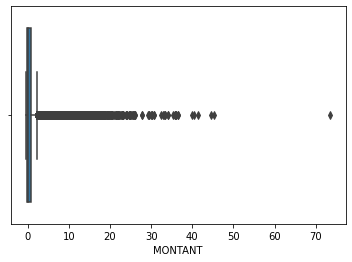

In [38]:
sns.boxplot(x=Train['MONTANT'])

#### ENCODING CATEGORICAL ATTRIBUTES

#### CHECKING FOR CORRELATION BETWEEN DEPENDENT VARIABLE AND INDEPENDENT VARIABLES

#### DIMENSIONALITY REDUCTION